## Getting the GSS Data

Since the data files are about 40GB zipped, we can't store a compressed or uncompressed version on GitHub, and the entire dataset can't really be loaded into memory with Colab.

One option is to use Rivana: Download the data, unzip it, and work on it in a persistent environment.

The other option is to avoid opening the entire file at once, and instead work with chunks of the data. That's what this code does for you.

On GitHub, the data are broken into three smaller files, saved in .parquet format. The code below will load these chunks into memory, one at a time, you can specify the variables you want in `var_list`, and the results will be saved in `selected_gss_data.csv`.

You can add more cleaning instructions in between the lines where the data are loaded ( `df = pd.read_parquet(url)`) and the data are saved (`df.loc...`). It's probably easiest to use this code to get only the variables you want, and then clean that subset of the data.

In [4]:
pip install pyarrow

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 10.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#
var_list = ['year', 'commute', 'marital', 'educ', 'childs', 'famdif16', 'homosex', 'natenvir'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

In [29]:
data = pd.read_csv('selected_gss_data.csv')
data.head()

,year,commute,marital,educ,childs,famdif16,homosex,natenvir
0,1972,NaN,never married,16.0,0.0,NaN,NaN,NaN
1,1972,NaN,married,10.0,5.0,NaN,NaN,NaN
2,1972,NaN,married,12.0,4.0,NaN,NaN,NaN
3,1972,NaN,married,17.0,0.0,NaN,NaN,NaN
4,1972,NaN,married,12.0,2.0,NaN,NaN,NaN


I chose a combination of variables that could be used to evaluate cultural changes across the time period tracked in this survey. Obviously, to be able to track over time, I need to use the time variable so I can evaluate trends of the other variables as a progression. I chose marital to look into potential insights on shifting views on marriage. Interesting things to look at with these two will include how the proportion of people who never marry changes over time and to see the correlation between the the two for a given year to determine if more mariages results in more divorce as one would expect. Beyond that, looking at how family life culture has shifted via the childs (# of children) and famdif16 (Whether or not someone lived with both their parents at 16) will produce interesting results. I will be curious to know how the rate of people living with their parents at 16 has shifted over time, if at all. Additionally, looking for any correlation between years of peak in these previously mentioned variables, and years of peak in education (educ) or acceptance/denial of homosexuality (homosex) will produce fascinating results. These two variables give another layer of insight into the development of the culture that expands outside family life in a more impactful way. As neither of these things are directly related to family life, finding their trends and relations to more family-related variable, if there are trends to be found, could provide intriguing results about what aspects of culture have developed jointly. Lastly, I chose a variable examining opinions on the governments environmental spending (natenvir). I think of the urgency and prevelance of pressure to stop climate change as something that has increased dramatically since the turn of the century, so looking at the development of answers to this question, and its associations with other questions will allow a more indepth understanding of how this conversation has evolved. Overall, I chose this combination of variables to run EDA on because they provide different dimensions of culture to evaluate to decipher how different things have changed over the last ~50 years.

GSS Provided Questions:

Year: GSS Year

Commute: About how much time (does/did) it usually take you to travel to work - about how many minutes?

Marital: Are you currently--married, widowed, divorced, separated, or have you never been married?

Educ: What is the highest grade in elementary school or high school that you got credit for?

Childs: How many children have you ever had? 

Famdif16: Were you living with both your own mother and father around the time you were 16?

Homosex: What about sexual relations between two adults of the same sex--do you think it is always wrong, almost always wrong, wrong only sometimes, or not wrong at all?

Natenvir: Are we spending too much, too little, or about the right amount on improving and protecting the environment?

In [16]:
data.head(10)

,year,commute,marital,educ,childs,famdif16,homosex,natenvir
0,1972,NaN,never married,16.0,0.0,NaN,NaN,NaN
1,1972,NaN,married,10.0,5.0,NaN,NaN,NaN
2,1972,NaN,married,12.0,4.0,NaN,NaN,NaN
3,1972,NaN,married,17.0,0.0,NaN,NaN,NaN
4,1972,NaN,married,12.0,2.0,NaN,NaN,NaN
5,1972,NaN,never married,14.0,0.0,NaN,NaN,NaN
6,1972,NaN,divorced,13.0,2.0,NaN,NaN,NaN
7,1972,NaN,never married,16.0,0.0,NaN,NaN,NaN
8,1972,NaN,never married,12.0,2.0,NaN,NaN,NaN
9,1972,NaN,married,12.0,4.0,NaN,NaN,NaN


In [19]:
print(data['year'].describe(),'\n')
print(data['commute'].describe(),'\n')
print(data['marital'].describe(),'\n')
print(data['educ'].describe(),'\n')
print(data['childs'].describe(),'\n')
print(data['famdif16'].describe(),'\n')
print(data['homosex'].describe(),'\n')
print(data['natenvir'].describe(),'\n')

count    72390.000000
mean      1997.715541
std         15.109995
min       1972.000000
25%       1985.000000
50%       1998.000000
75%       2010.000000
max       2022.000000
Name: year, dtype: float64 

count    1330.000000
mean       20.245865
std        17.082472
min         0.000000
25%        10.000000
50%        15.000000
75%        30.000000
max        97.000000
Name: commute, dtype: float64 

count       72339
unique          5
top       married
freq        37590
Name: marital, dtype: object 

count    72127.000000
mean        13.034633
std          3.182372
min          0.000000
25%         12.000000
50%         12.000000
75%         16.000000
max         20.000000
Name: educ, dtype: float64 

count    72129.000000
mean         1.916538
std          1.759511
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: childs, dtype: float64 

count                             18355
unique                                5


From these results there is nothing that very obviously has to be cleaned as the descriptions of each variable are good

<Axes: >

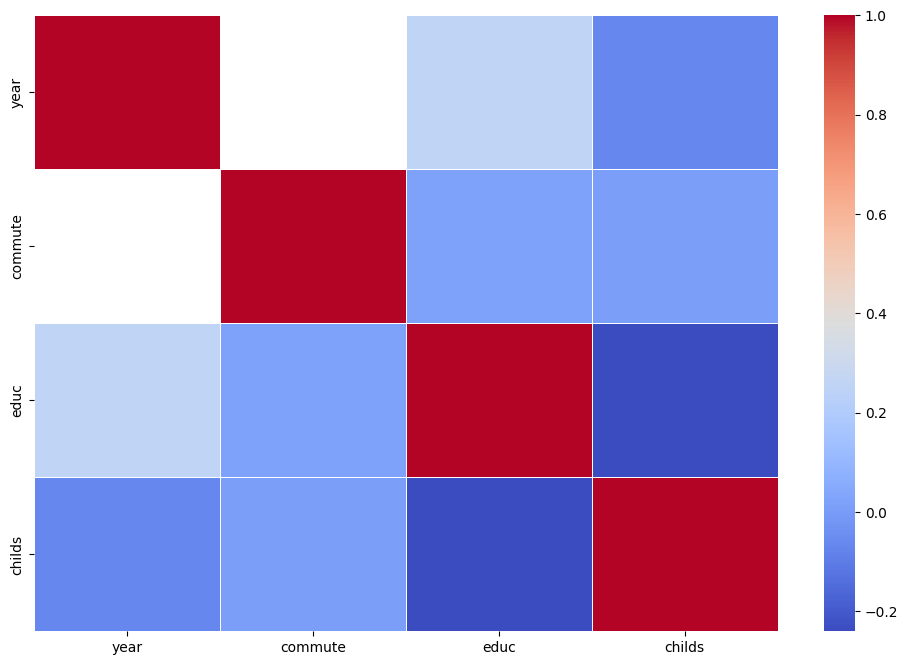

In [22]:
numeric_df = data.select_dtypes(include=['number'])

# Create correlation matrix
plt.figure(figsize=(12, 8))
corr = numeric_df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=0.5)

Not much to learn from this, the slight negative correlation between childs and educ is interesting but needs more digging, and the white squares for year and commute raises a red flag.

In [25]:
df_filtered = data[data['commute'].isnull() == False]
df_filtered.describe()

,year,commute,educ,childs
count,1330.0,1330.000000,1330.000000,1328.000000
mean,1986.0,20.245865,12.541353,2.011295
std,0.0,17.082472,3.132180,1.844528
min,1986.0,0.000000,0.000000,0.000000
25%,1986.0,10.000000,11.000000,0.000000
50%,1986.0,15.000000,12.000000,2.000000
75%,1986.0,30.000000,14.000000,3.000000
max,1986.0,97.000000,20.000000,8.000000


This shows commute was only tracked in 1986, so isn't super helpful for looking at development over time and can be removed from the df

In [30]:
data.drop(columns=['commute'], inplace=True)
data.head()

,year,marital,educ,childs,famdif16,homosex,natenvir
0,1972,never married,16.0,0.0,NaN,NaN,NaN
1,1972,married,10.0,5.0,NaN,NaN,NaN
2,1972,married,12.0,4.0,NaN,NaN,NaN
3,1972,married,17.0,0.0,NaN,NaN,NaN
4,1972,married,12.0,2.0,NaN,NaN,NaN


Everything else has enough data and is formatted correctly for EDA

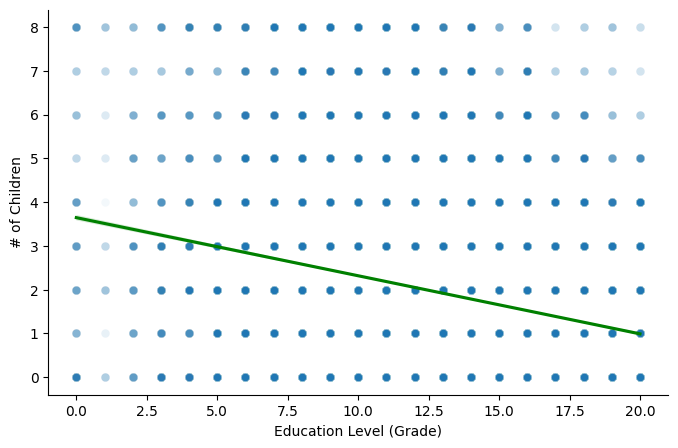

In [38]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='educ', y='childs', data=data, alpha=0.05) #create the scatter with very small alpha to emphasize where there is overlap
sns.regplot(x='educ', y='childs', data=data, scatter=False, color='green') #create trendline 
plt.xlabel("Education Level (Grade)")
plt.ylabel("# of Children")

ax = plt.gca()
#take spines off
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
plt.show()


/var/folders/xl/310109g14sg2kt37m2ch56h80000gn/T/ipykernel_91104/3257881977.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='famdif16', data=data, order=data['famdif16'].value_counts().index, palette='Set1')


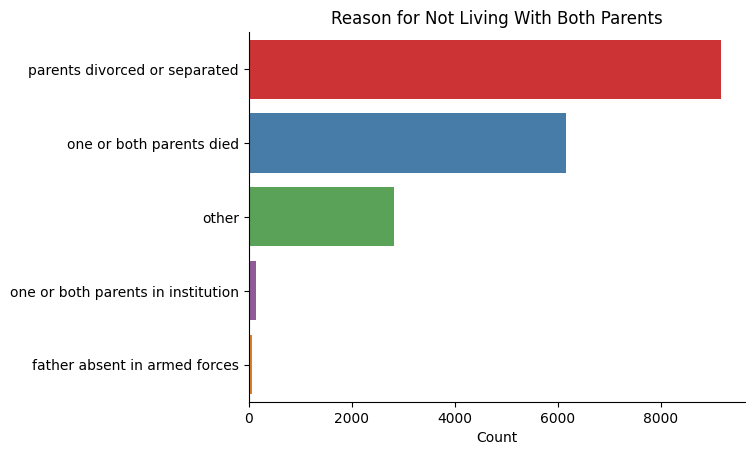

In [49]:
sns.countplot(y='famdif16', data=data, order=data['famdif16'].value_counts().index, palette='Set1')
plt.title("Reason for Not Living With Both Parents")
plt.xlabel("Count")
plt.ylabel("")

ax = plt.gca()
#take spines off
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)

plt.show()

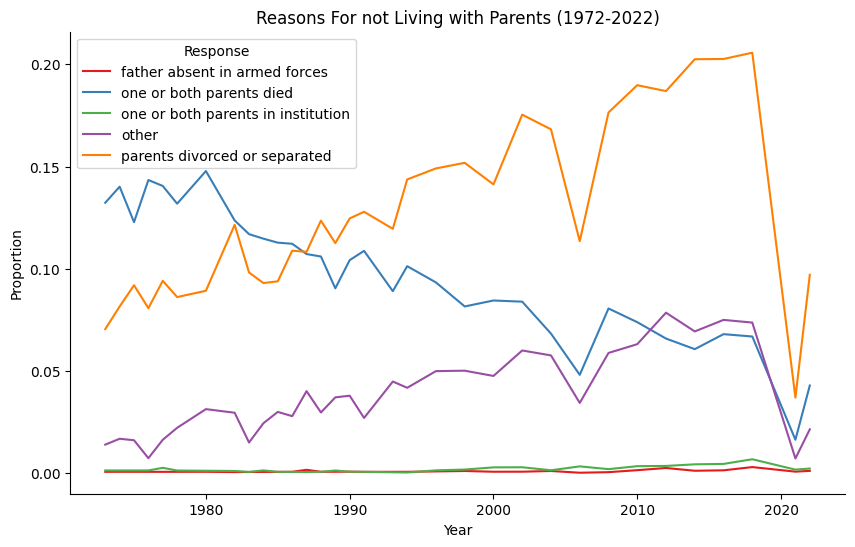

In [58]:
plt.figure(figsize=(10,6))
famdif_time = data.groupby(['year', 'famdif16']).size().reset_index(name='Count')

# get total responses for each year
famdif_total = data.groupby('year').size().reset_index(name='Total')

# merge to calculate proportions
famdif_time = famdif_time.merge(famdif_total, on='year')
famdif_time['Proportion'] = famdif_time['Count'] / famdif_time['Total']

sns.lineplot(data=famdif_time, x='year', y='Proportion', hue='famdif16', palette='Set1')
plt.title("Reasons For not Living with Parents (1972-2022)")
plt.xlabel("Year")
plt.ylabel("Proportion")
plt.legend(title="Response")

ax = plt.gca()
#take spines off
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)

plt.show()


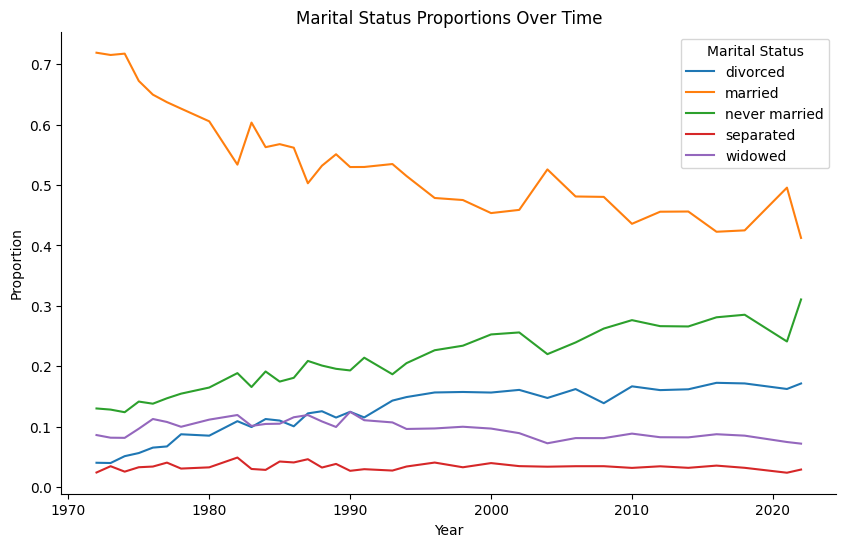

In [61]:
# mostly the same syntax from the last visulization

marital_time = data.groupby(['year', 'marital']).size().reset_index(name='Count')
marital_total = data.groupby('year').size().reset_index(name='Total')
marital_time = marital_time.merge(marital_total, on='year')
marital_time['Proportion'] = marital_time['Count'] / marital_time['Total']

plt.figure(figsize=(10, 6))
sns.lineplot(data=marital_time, x='year', y='Proportion', hue='marital')
plt.title("Marital Status Proportions Over Time")
plt.ylabel("Proportion")
plt.xlabel("Year")
plt.legend(title='Marital Status')

ax = plt.gca()
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)

plt.show()


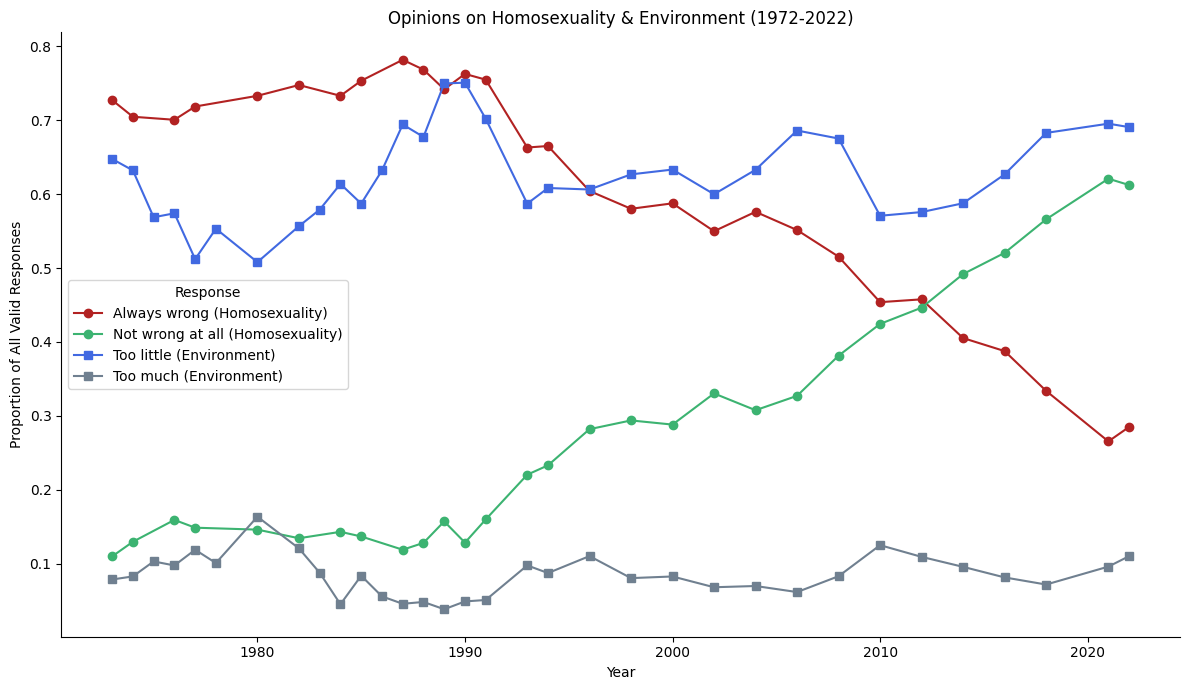

In [80]:
plt.figure(figsize=(12, 7))

# makes yearly proportions for always wrong
homo = data[data['homosex'].notna()]
homo_totals = homo.groupby('year').size()
homo_aw = homo[homo['homosex'] == 'always wrong'].groupby('year').size()
homo_aw_prop = (homo_aw / homo_totals).reset_index(name='proportion')
plt.plot(homo_aw_prop['year'], homo_aw_prop['proportion'], marker='o', label='Always wrong (Homosexuality)', color = 'firebrick')

# same for never wrong
homo_nwa = homo[homo['homosex'] == 'not wrong at all'].groupby('year').size()
homo_nwa_prop = (homo_nwa / homo_totals).reset_index(name='proportion')
plt.plot(homo_nwa_prop['year'], homo_nwa_prop['proportion'], marker='o', label='Not wrong at all (Homosexuality)', color = 'mediumseagreen')

# for too little (natenvir)
env = data[data['natenvir'].notna()]
env_totals = env.groupby('year').size()
env_tl = env[env['natenvir'] == 'too little'].groupby('year').size()
env_tl_prop = (env_tl / env_totals).reset_index(name='proportion')
plt.plot(env_tl_prop['year'], env_tl_prop['proportion'], marker='s', label='Too little (Environment)', color = 'royalblue')

# for too much 
env_tm = env[env['natenvir'] == 'too much'].groupby('year').size()
env_tm_prop = (env_tm / env_totals).reset_index(name='proportion')
plt.plot(env_tm_prop['year'], env_tm_prop['proportion'], marker='s', label='Too much (Environment)', color= 'slategray')

# fix up chart
plt.title("Opinions on Homosexuality & Environment (1972-2022)")
plt.xlabel("Year")
plt.ylabel("Proportion of All Valid Responses")
plt.legend(title="Response")
plt.tight_layout()

ax = plt.gca()
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)

plt.show()

In [81]:
pd.crosstab(data['homosex'], data['natenvir'])

natenvir,about right,too little,too much
homosex,,,
almost always wrong,374,734,93
always wrong,4745,7923,1643
not wrong at all,1329,5179,348
other,14,60,4
wrong only sometimes,424,1094,135


<function matplotlib.pyplot.show(close=None, block=None)>

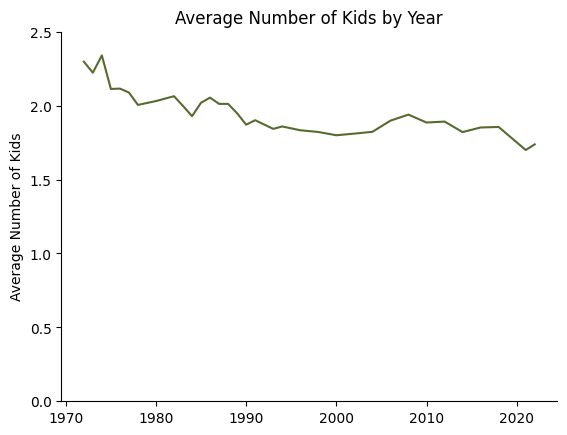

In [93]:
kids = data[data['childs'].notna()]
kid_avg = kids.groupby('year')['childs'].mean()
plt.plot(kid_avg.index, kid_avg.values, color = 'darkolivegreen')

plt.ylim(0,2.5)
plt.ylabel('Average Number of Kids')
plt.title('Average Number of Kids by Year')

ax = plt.gca()
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

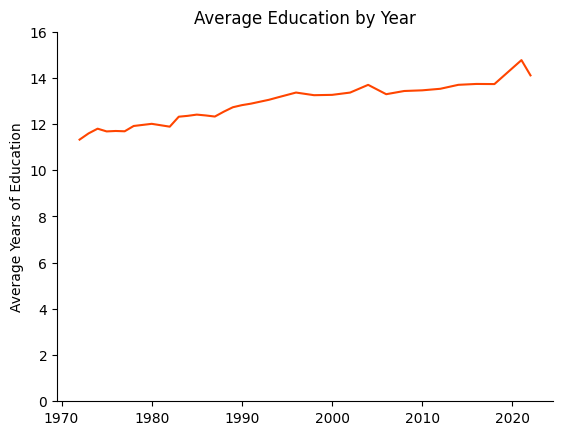

In [99]:
edus = data[data['educ'].notna()]
edu_avg = edus.groupby('year')['educ'].mean()
plt.plot(edu_avg.index, edu_avg.values, color = 'orangered')

plt.ylim(0,16)
plt.ylabel('Average Years of Education')
plt.title('Average Education by Year')

ax = plt.gca()
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)

plt.show

Visual 1:
This is an interesting plot for a couple reasons
1. The scatter portion of this plot is not super useful because every single possible spot has a dot, and you can only differentiate by darkness, even then is not super helpful.
2. There being so many dots right at 8 despite the fact that 8 is listed at the max in the entire dataset tells me that the survey somehow limited the max number to 8, so there may have been respondents with more than 8 children.
3. Despite the scatter being unhelpful, the trendline shows very clearly that more education is correlated with less children

Visual 2: 
Nothing too surprising about these results but they could be more interesting shown as change over time.

Visual 3: 
Most interesting patterns that arise from this are the steady climb of separated/divorced parents coinciding with the decline of deceased parents from 1972 up until the pandemic in 2020 when all proportions fell by an extreme amount, showing that the pandemic resulted in many 16 year olds living with both their parents. 

This gives an idea of what a divorce over time chart would look like so that will be my next graphical inquiry.

Visual 4:
The relatively steep decline of proportion of people who are married from 1972-2022 is unsurprising based on the prior chart. This also tracks with the steady incline of proportion of people who are divorced or never married in the same time frame.

Visual 5: 
I wanted to make this graph to see if there was any correlation in time of increase for embrace of homosexuality and more spending on the environment. While both have been increasing since ~2010, I was surprised that the proportion of people who think we should be spending more has been consistently above 50% and actually peaked in the late 80s/ early 90s

Cross Tabulated Table 1:
This does reveal a little more about the relations from visual 5 (not related to time) as people who said homosexuality is always wrong said that there is too little spending on the environment at a much lower rate. This makes sense as it falls more in line with modern patisan lines.

Visual 6:
Chart shows obvious downward trend of average number of kids per respondent.

Visual 7:
Chart shows the average years of education by respondent has been steadily increasing. This falls in line with the negative correlation of education with number of kids and the decreasing average number of kids.